In [ ]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 17.0 MB/s eta 0:00:00
Using legacy 'setup.py install' for kaggle, since package 'wheel' is not installed.
  Running setup.py install for kaggle ... done


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/home/dsarda/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100%|██████████████████████████████████████▉| 5.19G/5.20G [01:01<00:00, 105MB/s]
100%|██████████████████████████████████████| 5.20G/5.20G [01:01<00:00, 90.7MB/s]


In [ ]:
!unzip skin-cancer-mnist-ham10000.zip

Archive:  skin-cancer-mnist-ham10000.zip
  inflating: HAM10000_images_part_1/ISIC_0024306.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024307.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024308.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024309.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024310.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024311.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024312.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024313.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024314.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024315.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024316.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024317.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024318.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024319.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024320.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024321.jpg  
  inflating: HAM10000_images_part_1/ISIC_0024322.jpg  
  inflating: HAM10000_im

# Reading the csv file

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import random

# Read the CSV file into a DataFrame
df = pd.read_csv('HAM10000_metadata.csv')

# Count the occurrences of each unique value in the 'dx_type' column
dx_counts = df['dx'].value_counts()

# Print the counts of each dx_type
print("Counts of each dx:")
print(dx_counts)

Counts of each dx:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


**new code to run**

# Filter the images into 'bkl' and 'mel' (1000 each)

In [ ]:
import pandas as pd
import os
import random
import shutil

# Load the CSV file into a DataFrame
df = pd.read_csv('HAM10000_metadata.csv')

# Filter out images with cancer types "bkl" and "mel"
bkl_images = df[df['dx'] == 'bkl']
mel_images = df[df['dx'] == 'mel']
bkl_image_names = bkl_images['image_id'].tolist()
mel_image_names = mel_images['image_id'].tolist()

# Randomly select 500 'bkl' images
random_bkl_image_names = random.sample(bkl_image_names, 1000)

# Randomly select 500 'mel' images if available, otherwise select all available 'mel' images
if len(mel_image_names) >= 1000:
    random_mel_image_names = random.sample(mel_image_names, 1000)
else:
    random_mel_image_names = mel_image_names

# Create directories for "bkl" and "mel" images
bkl_output_dir = "bkl_images"
mel_output_dir = "mel_images"
os.makedirs(bkl_output_dir, exist_ok=True)
os.makedirs(mel_output_dir, exist_ok=True)

# Copy selected 'bkl' images to the "bkl_images" directory
for image_name in random_bkl_image_names:
    source_path = os.path.join('HAM10000_images_part_1/', image_name + ".jpg")
    if not os.path.exists(source_path):
        source_path = os.path.join('HAM10000_images_part_2/', image_name + ".jpg")
    dest_path = os.path.join(bkl_output_dir, image_name + ".jpg")
    shutil.copyfile(source_path, dest_path)

# Copy selected 'mel' images to the "mel_images" directory
for image_name in random_mel_image_names:
    source_path = os.path.join('HAM10000_images_part_1/', image_name + ".jpg")
    if not os.path.exists(source_path):
        source_path = os.path.join('HAM10000_images_part_2/', image_name + ".jpg")
    dest_path = os.path.join(mel_output_dir, image_name + ".jpg")
    shutil.copyfile(source_path, dest_path)

print("Number of 'bkl' images:", len(os.listdir(bkl_output_dir)))
print("Number of 'mel' images:", len(os.listdir(mel_output_dir)))


Number of 'bkl' images: 1099
Number of 'mel' images: 1113


# Plot the data that we are going to use for our model

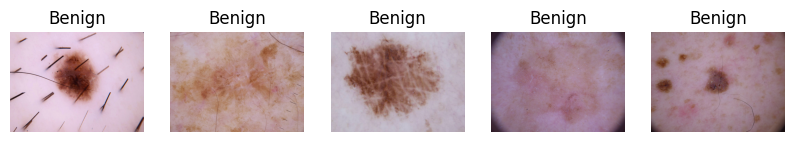

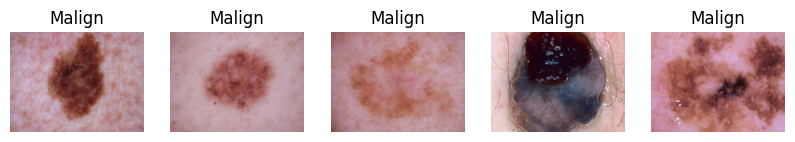

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Function to display sample images
def display_sample_images(image_dir, label):
    plt.figure(figsize=(10, 5))
    images = os.listdir(image_dir)
    random.shuffle(images)
    for i in range(5):  # Displaying 5 sample images
        image_path = os.path.join(image_dir, images[i])
        image = imread(image_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Display sample images from each category
display_sample_images(bkl_output_dir, label="Benign")
display_sample_images(mel_output_dir, label="Malign")

In [ ]:
import zipfile

# Define the name for the zip file
zip_filename = "gpu_images.zip"

# Add 'bkl_images' and 'other_images' directories to the zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(bkl_output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), bkl_output_dir))
    for root, dirs, files in os.walk(mel_output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), mel_output_dir))

print("Generated images have been saved in", zip_filename)


Generated images have been saved in gpu_images.zip


In [ ]:
# List the contents of the 'generated_images' directory
gpu_images_dir = 'gpu_images'
contents = os.listdir(gpu_images_dir)
print("Contents of 'gpu_images' directory:", contents)

# Iterate through subdirectories and list their contents
for subdir in contents:
    subdir_path = os.path.join(gpu_images_dir, subdir)
    if os.path.isdir(subdir_path):
        subdir_contents = os.listdir(subdir_path)
        print(f"Contents of '{subdir}' directory:", subdir_contents)


Contents of 'gpu_images' directory: []


In [ ]:
# Extract the images and load the CSV file
with zipfile.ZipFile('gpu_images.zip', 'r') as zip_ref:
    zip_ref.extractall('gpu_images')

df = pd.read_csv('HAM10000_metadata.csv')

# Create directories for each diagnosis
output_dir = 'gpu_images'
for diagnosis in df['dx'].unique():
    os.makedirs(os.path.join(output_dir, diagnosis), exist_ok=True)

# Move images to their respective diagnosis directories
for index, row in df.iterrows():
    image_name = row['image_id'] + '.jpg'
    source_path = os.path.join(output_dir, image_name)
    if os.path.exists(source_path):
        diagnosis_dir = os.path.join(output_dir, row['dx'])
        shutil.move(source_path, os.path.join(diagnosis_dir, image_name))

# Remove empty directories
for folder in os.listdir(output_dir):
    folder_path = os.path.join(output_dir, folder)
    if os.path.isdir(folder_path) and not os.listdir(folder_path):
        os.rmdir(folder_path)


In [ ]:
import zipfile

# Extract the images from the zip file
with zipfile.ZipFile('gpu_images.zip', 'r') as zip_ref:
    zip_ref.extractall('gpu_images')

# Create directories for 'bkl_images' and 'other_images'
os.makedirs('gpu_images/bkl_images', exist_ok=True)
os.makedirs('gpu_images/mel_images', exist_ok=True)

# Move the images to their respective directories
source_dir = 'gpu_images'
bkl_output_dir = 'gpu_images/bkl_images'
other_output_dir = 'gpu_images/mel_images'

# Move images from 'bkl_images' folder to 'bkl_images' directory
for filename in os.listdir(os.path.join(source_dir, 'bkl_images')):
    shutil.move(os.path.join(source_dir, 'bkl_images', filename), os.path.join(bkl_output_dir, filename))

# Move images from 'other_images' folder to 'other_images' directory
for filename in os.listdir(os.path.join(source_dir, 'mel_images')):
    shutil.move(os.path.join(source_dir, 'mel_images', filename), os.path.join(other_output_dir, filename))

# Remove the empty 'bkl_images' and 'other_images' folders
os.rmdir(os.path.join(source_dir, 'bkl_images'))
os.rmdir(os.path.join(source_dir, 'mel_images'))



# Create InceptionV3 Model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Set up data generators
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 30

train_generator = data_generator.flow_from_directory(
    'generated_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    'generated_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer for the number of classes
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Save the model
model.save('googlenet_trained_model.h5')


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.4783 - loss: 0.8104 - val_accuracy: 0.4850 - val_loss: 0.7798
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.5130 - loss: 0.7339 - val_accuracy: 0.5450 - val_loss: 0.7329
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.5466 - loss: 0.6977 - val_accuracy: 0.5600 - val_loss: 0.7007
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.6455 - loss: 0.6403 - val_accuracy: 0.6000 - val_loss: 0.6766
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.6379 - loss: 0.6353 - val_accuracy: 0.6300 - val_loss: 0.6601
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.6750 - loss: 0.6172 - val_accuracy: 0.6600 - val_loss: 0.6433
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.6930 - loss: 0.5984 - val_accuracy: 0.6500 - val_loss: 0.6305
Epoch 8/10
27/27 ━━━

Validation Loss: 0.6039139032363892
Validation Accuracy: 0.6700000166893005


# Create InceptionV3 Model + Visualization of Results

Found 1771 images belonging to 2 classes.
Found 441 images belonging to 2 classes.
Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.5116 - loss: 0.7335 - val_accuracy: 0.5420 - val_loss: 0.6993
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.6482 - loss: 0.6467 - val_accuracy: 0.5873 - val_loss: 0.6715
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6613 - loss: 0.6245 - val_accuracy: 0.6145 - val_loss: 0.6566
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.7025 - loss: 0.5983 - val_accuracy: 0.6463 - val_loss: 0.6427
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.7276 - loss: 0.5722 - val_accuracy: 0.6440 - val_loss: 0.6362
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.7135 - loss: 0.5659 - val_accuracy: 0.6576 - val_loss: 0.6287
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.7185 - loss: 0.5567 - val_accuracy: 0.6599 - val_loss: 0.6225
Epoch 8/30
60/

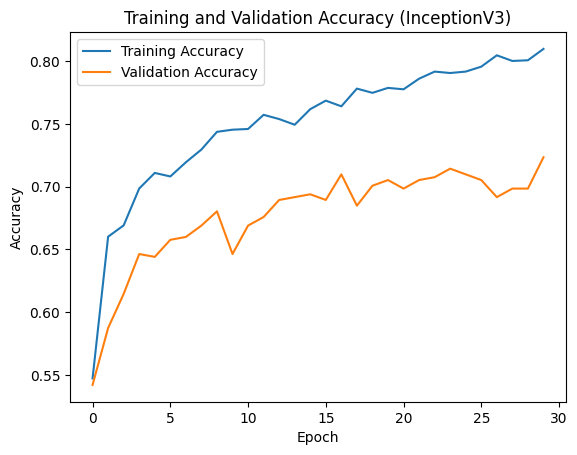

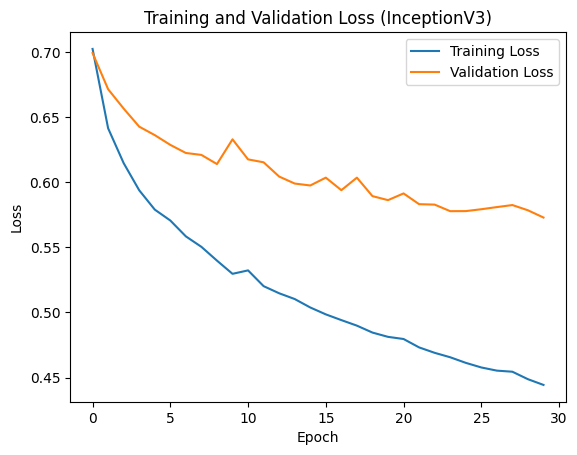

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.7392 - loss: 0.5591


Validation Loss: 0.5729189515113831
Validation Accuracy: 0.7233560085296631


In [ ]:
#Googlenet Done, best result we could get.
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Set up data generators
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 30

train_generator = data_generator.flow_from_directory(
    'gpu_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    'gpu_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer for the number of classes
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
historyInceptionV3 = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Visualize training history
plt.plot(historyInceptionV3.history['accuracy'], label='Training Accuracy')
plt.plot(historyInceptionV3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (InceptionV3)')
plt.legend()
plt.show()

plt.plot(historyInceptionV3.history['loss'], label='Training Loss')
plt.plot(historyInceptionV3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (InceptionV3)')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Save the model
model.save('inceptionv3_trained_model.h5')


# Create ResNet50 Model + Visualization of Results

Found 1771 images belonging to 2 classes.
Found 441 images belonging to 2 classes.
Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 383ms/step - accuracy: 0.5176 - loss: 0.9347 - val_accuracy: 0.6213 - val_loss: 0.6927
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 361ms/step - accuracy: 0.4744 - loss: 0.8066 - val_accuracy: 0.4966 - val_loss: 0.7074
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.5094 - loss: 0.7720 - val_accuracy: 0.4966 - val_loss: 0.7046
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.5362 - loss: 0.7444 - val_accuracy: 0.4943 - val_loss: 0.6926
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.4957 - loss: 0.7663 - val_accuracy: 0.4898 - val_loss: 0.6925
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 359ms/step - accuracy: 0.4831 - loss: 0.7708 - val_accuracy: 0.6304 - val_loss: 0.6914
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 359ms/step - accuracy: 0.4781 - loss: 0.7554 - val_accuracy: 0.4966 - val_loss: 0.6980
Epoch 8/30
60/

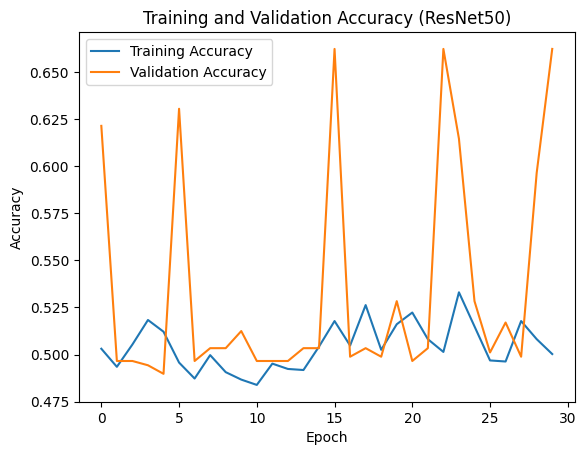

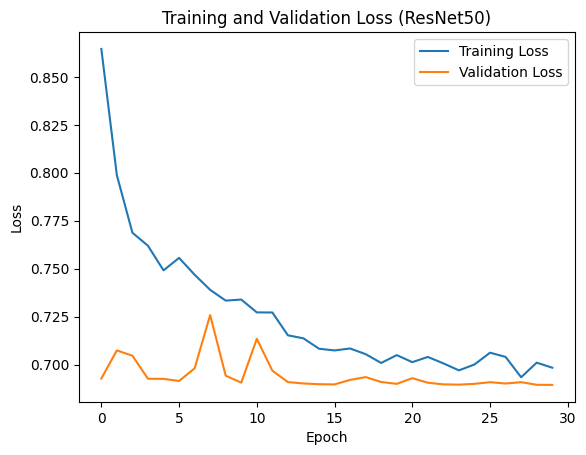

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.6868 - loss: 0.6893


Validation Loss: 0.6893512010574341
Validation Accuracy: 0.6621315479278564


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Set up data generators
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 30

train_generator = data_generator.flow_from_directory(
    'gpu_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    'gpu_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# Add a logistic layer for the number of classes
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
historyResNet50 = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Visualize training history
plt.plot(historyResNet50.history['accuracy'], label='Training Accuracy')
plt.plot(historyResNet50.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (ResNet50)')
plt.legend()
plt.show()

plt.plot(historyResNet50.history['loss'], label='Training Loss')
plt.plot(historyResNet50.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (ResNet50)')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Save the model
model.save('resnet50_trained_model.h5')


# Create DenseNet121 Model + Visualization of Results

Found 1771 images belonging to 2 classes.
Found 441 images belonging to 2 classes.
Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 495ms/step - accuracy: 0.5159 - loss: 0.8321 - val_accuracy: 0.5578 - val_loss: 0.6974
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.5597 - loss: 0.7561 - val_accuracy: 0.5442 - val_loss: 0.6855
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 459ms/step - accuracy: 0.5596 - loss: 0.7518 - val_accuracy: 0.5918 - val_loss: 0.6770
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 455ms/step - accuracy: 0.5752 - loss: 0.7143 - val_accuracy: 0.6168 - val_loss: 0.6677
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 427ms/step - accuracy: 0.5974 - loss: 0.7015 - val_accuracy: 0.6190 - val_loss: 0.6561
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 449ms/step - accuracy: 0.6219 - loss: 0.6557 - val_accuracy: 0.6372 - val_loss: 0.6475
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 456ms/step - accuracy: 0.6247 - loss: 0.6631 - val_accuracy: 0.6485 - val_loss: 0.6450
Epoch 8/30
60/

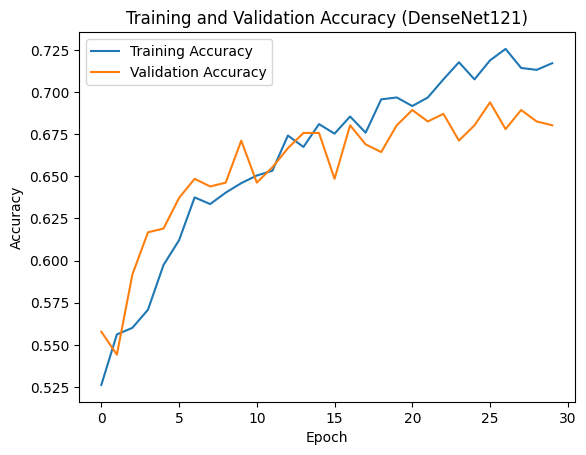

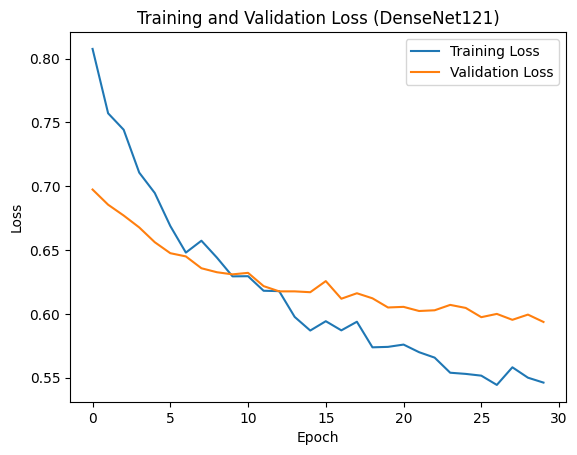

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.6851 - loss: 0.5876


Validation Loss: 0.5936651825904846
Validation Accuracy: 0.680272102355957


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Set up data generators
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 30

train_generator = data_generator.flow_from_directory(
    'gpu_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    'gpu_images',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the DenseNEt model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# Add a logistic layer for the number of classes
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
historyDensenet121 = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Visualize training history
plt.plot(historyDensenet121.history['accuracy'], label='Training Accuracy')
plt.plot(historyDensenet121.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (DenseNet121)')
plt.legend()
plt.show()

plt.plot(historyDensenet121.history['loss'], label='Training Loss')
plt.plot(historyDensenet121.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (DenseNet121)')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Save the model
model.save('densenet121_trained_model.h5')


# Model Comparison - Training and Validation Accuracy

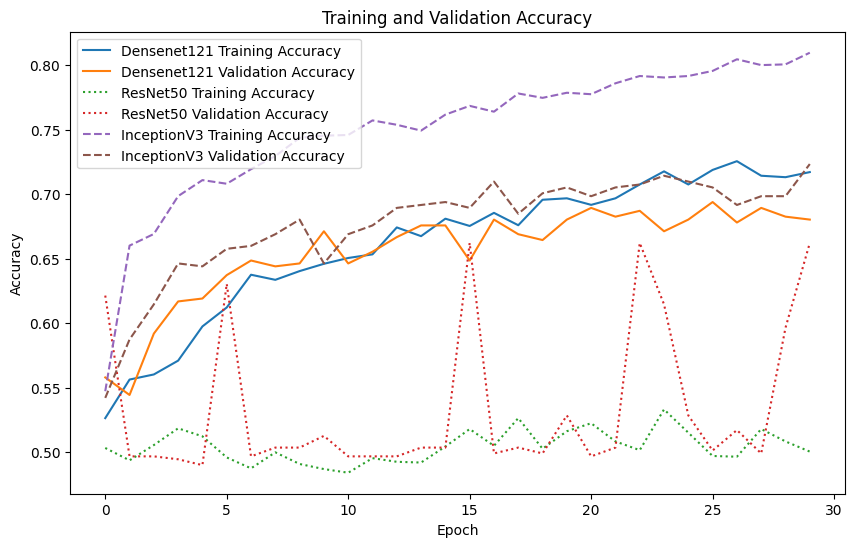

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(historyDensenet121.history['accuracy'], label='Densenet121 Training Accuracy')
plt.plot(historyDensenet121.history['val_accuracy'], label='Densenet121 Validation Accuracy')
plt.plot(historyResNet50.history['accuracy'], label='ResNet50 Training Accuracy', linestyle='dotted')
plt.plot(historyResNet50.history['val_accuracy'], label='ResNet50 Validation Accuracy', linestyle='dotted')
plt.plot(historyInceptionV3.history['accuracy'], label='InceptionV3 Training Accuracy', linestyle='dashed')
plt.plot(historyInceptionV3.history['val_accuracy'], label='InceptionV3 Validation Accuracy', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Model Comparison - Training and Validation Loss

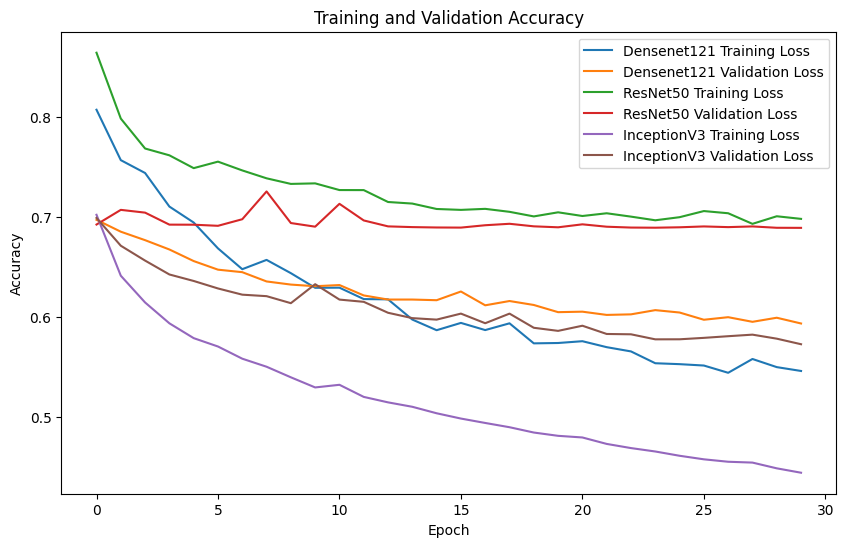

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(historyDensenet121.history['loss'], label='Densenet121 Training Loss')
plt.plot(historyDensenet121.history['val_loss'], label='Densenet121 Validation Loss')
plt.plot(historyResNet50.history['loss'], label='ResNet50 Training Loss', linestyle='dashed')
plt.plot(historyResNet50.history['val_loss'], label='ResNet50 Validation Loss', linestyle='dotted')
plt.plot(historyInceptionV3.history['loss'], label='InceptionV3 Training Loss', linestyle='dashed')
plt.plot(historyInceptionV3.history['val_loss'], label='InceptionV3 Validation Loss', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()